# Unified Neural Network Training

[![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tum-pbs/ML4Science/blob/main/docs/Networks.ipynb)
&nbsp; • &nbsp; [🌐 **ML4Science**](https://github.com/tum-pbs/ML4Science)
&nbsp; • &nbsp; [📖 **Documentation**](https://tum-pbs.github.io/ML4Science/)
&nbsp; • &nbsp; [🔗 **API**](https://tum-pbs.github.io/ML4Science/ml4s)
&nbsp; • &nbsp; [**▶ Videos**]()
&nbsp; • &nbsp; [<img src="images/colab_logo_small.png" height=4>](https://colab.research.google.com/github/tum-pbs/ML4Science/blob/main/docs/Examples.ipynb) [**Examples**](https://tum-pbs.github.io/ML4Science/Examples.html)

ML4Science provides basic tools to set up and train neural networks.
Users can choose one of several standard network architectures and configure them in one line of code.
After defining a loss function, they can then be trained in a unified way or using library-specific functions.

In [ ]:
%%capture
!pip install ml4s

from matplotlib import pyplot as plt

## Network Architectures

The [neural network API](ml4s/nn) includes multiple common network architectures, such as [multi-layer perceptrons](ml4s/nn#ml4s.nn.mlp),
[U-Nets](ml4s/nn#ml4s.nn.u_net), [convolutional networks](ml4s/nn#ml4s.nn.conv_net), [ResNets](ml4s/nn#ml4s.nn.res_net), [invertible networks](ml4s/nn#ml4s.nn.invertible_net), and [VGG-like networks](ml4s/nn#ml4s.nn.conv_classifier).
All networks operating on grids are supported in 1D, 2D and 3D for periodic and non-periodic domains.

In [ ]:
from ml4s import math, nn
math.use('torch')

## Training an MLP

Let's create an MLP and train it to learn a 1D sine function.
First, we set up the network with two hidden layers of 64 neurons each.

In [ ]:
mlp = nn.mlp(in_channels=1, out_channels=1, layers=[64, 64], activation='ReLU')
mlp

Note that this is a standard neural network of the chosen library (a PyTorch Module in this case).
This allows you to quickly try many network designs without writing much code, even if you don't use ML4Science for anything else.

Next, let's generate some training data.

In [ ]:
DATASET = math.batch(examples=100)
x = math.random_uniform(DATASET, low=-math.PI, high=math.PI)
y = math.sin(x) + math.random_normal(DATASET) * .1
plt.scatter(x.numpy(), y.numpy())

For the loss function, we will use the $L^2$ comparing prediction to labels.
We use [`math.native_call()`](ml4s/math#ml4s.math.native_call) to call the network with native tensors reshaped to the preferences of the current backend library.
This will pass tensors of shape BCS to PyTorch and BSC to TensorFlow and Jax, where B denotes the packed batch dimensions, C the packed channel dimensions and S all spatial dimensions.

In [ ]:
def loss_function(network_input, label):
    prediction = math.native_call(mlp, network_input)
    return math.l2_loss(prediction - label), prediction

Next, we create an optimizer, such as [`SGD`](ml4s/nn#ml4s.nn.sgd), [`Adam`](ml4s/nn#ml4s.nn.adam), [`AdaGrad`](ml4s/nn#ml4s.nn.adagrad), or [`RMSprop`](ml4s/nn#ml4s.nn.rmsprop).
The returned optimizer is again a library-specific type (in this case a PyTorch optimizer).

In [ ]:
optimizer = nn.adam(mlp, learning_rate=5e-3)
optimizer

Finally, we repeatedly update the weights using backprop.
Here, we use [`update_weights()`](ml4s/nn#ml4s.nn.update_weights), passing in the network, optimizer, loss function, and loss function arguments.
If you want more control over the training loop, you can use library-specific functions as well, since the network and optimizer do not depend on ML4Science.

In [ ]:
for i in range(200):
    loss, pred = nn.update_weights(mlp, optimizer, loss_function, x, y)
plt.scatter(x.numpy(), pred.numpy())

## Training a U-Net

Following the principles of ML4Science, U-Nets, as well as many other network architectures, can [operate on 1D, 2D or 3D](N_Dimensional.html) grids.
The number of spatial dimensions, `in_spatial`, must be specified when creating the network.

In [ ]:
u_net = nn.u_net(in_channels=1, out_channels=1, levels=4, periodic=False, in_spatial=2)
optimizer = nn.adam(u_net, 1e-3)

Let's train the network to turn a 2D grid of random noise into a Gaussian distribution.

In [ ]:
SPATIAL = math.spatial(x=64, y=64)
x = math.random_normal(SPATIAL)
y = math.exp(-.5 * math.vec_squared((math.meshgrid(SPATIAL) / SPATIAL) - .5))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.imshow(x.numpy('y,x'))
ax2.imshow(y.numpy('y,x'))

Let's train the network!

In [ ]:
def loss_function():
    prediction = math.native_call(u_net, x)
    return math.l2_loss(prediction - y), prediction

for i in range(200):
    loss, pred = nn.update_weights(u_net, optimizer, loss_function)

plt.imshow(pred.numpy('y,x'))

## Further Reading

[🌐 **ML4Science**](https://github.com/tum-pbs/ML4Science)
&nbsp; • &nbsp; [📖 **Documentation**](https://tum-pbs.github.io/ML4Science/)
&nbsp; • &nbsp; [🔗 **API**](https://tum-pbs.github.io/ML4Science/ml4s)
&nbsp; • &nbsp; [**▶ Videos**]()
&nbsp; • &nbsp; [<img src="images/colab_logo_small.png" height=4>](https://colab.research.google.com/github/tum-pbs/ML4Science/blob/main/docs/Examples.ipynb) [**Examples**](https://tum-pbs.github.io/ML4Science/Examples.html)

## Network Architectures

The [neural network API](ml4s/nn) includes multiple common network architectures, such as [multi-layer perceptrons](ml4s/nn#ml4s.nn.mlp),
[U-Nets](ml4s/nn#ml4s.nn.u_net), [convolutional networks](ml4s/nn#ml4s.nn.conv_net), [ResNets](ml4s/nn#ml4s.nn.res_net), [invertible networks](ml4s/nn#ml4s.nn.invertible_net), and [VGG-like networks](ml4s/nn#ml4s.nn.conv_classifier).
All networks operating on grids are supported in 1D, 2D and 3D for periodic and non-periodic domains.

In [70]:
from ml4s import math, nn
math.use('torch')

torch

## Training an MLP

Let's create an MLP and train it to learn a 1D sine function.
First, we set up the network with two hidden layers of 64 neurons each.

In [71]:
mlp = nn.mlp(in_channels=1, out_channels=1, layers=[64, 64], activation='ReLU')
mlp

DenseNet(
  (linear0): Linear(in_features=1, out_features=64, bias=True)
  (linear1): Linear(in_features=64, out_features=64, bias=True)
  (linear_out): Linear(in_features=64, out_features=1, bias=True)
)

Note that this is a standard neural network of the chosen library (a PyTorch Module in this case).
This allows you to quickly try many network designs without writing much code, even if you don't use ML4Science for anything else.

Next, let's generate some training data.

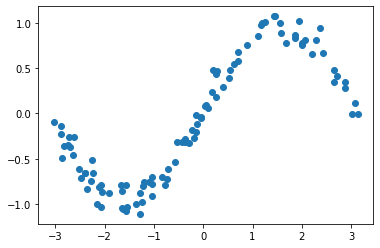

In [72]:
DATASET = math.batch(examples=100)
x = math.random_uniform(DATASET, low=-math.PI, high=math.PI)
y = math.sin(x) + math.random_normal(DATASET) * .1
plt.scatter(x.numpy(), y.numpy())

For the loss function, we will use the $L^2$ comparing prediction to labels.
We use [`math.native_call()`](ml4s/math#ml4s.math.native_call) to call the network with native tensors reshaped to the preferences of the current backend library.
This will pass tensors of shape BCS to PyTorch and BSC to TensorFlow and Jax, where B denotes the packed batch dimensions, C the packed channel dimensions and S all spatial dimensions.

In [73]:
def loss_function(network_input, label):
    prediction = math.native_call(mlp, network_input)
    return math.l2_loss(prediction - label), prediction

Next, we create an optimizer, such as [`SGD`](ml4s/nn#ml4s.nn.sgd), [`Adam`](ml4s/nn#ml4s.nn.adam), [`AdaGrad`](ml4s/nn#ml4s.nn.adagrad), or [`RMSprop`](ml4s/nn#ml4s.nn.rmsprop).
The returned optimizer is again a library-specific type (in this case a PyTorch optimizer).

In [74]:
optimizer = nn.adam(mlp, learning_rate=5e-3)
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-07
    foreach: None
    fused: None
    lr: 0.005
    maximize: False
    weight_decay: 0
)

Finally, we repeatedly update the weights using backprop.
Here, we use [`update_weights()`](ml4s/nn#ml4s.nn.update_weights), passing in the network, optimizer, loss function, and loss function arguments.
If you want more control over the training loop, you can use library-specific functions as well, since the network and optimizer do not depend on ML4Science.

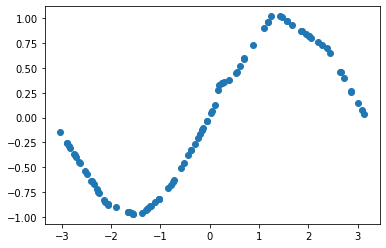

In [75]:
for i in range(200):
    loss, pred = nn.update_weights(mlp, optimizer, loss_function, x, y)
plt.scatter(x.numpy(), pred.numpy())

## Training a U-Net

Following the principles of ML4Science, U-Nets, as well as many other network architectures, can [operate on 1D, 2D or 3D](N_Dimensional.html) grids.
The number of spatial dimensions, `in_spatial`, must be specified when creating the network.

In [76]:
u_net = nn.u_net(in_channels=1, out_channels=1, levels=4, periodic=False, in_spatial=2)
optimizer = nn.adam(u_net, 1e-3)

Let's train the network to turn a 2D grid of random noise into a Gaussian distribution.

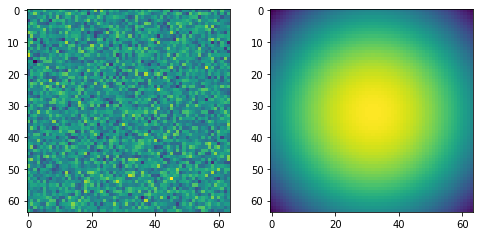

In [77]:
SPATIAL = math.spatial(x=64, y=64)
x = math.random_normal(SPATIAL)
y = math.exp(-.5 * math.vec_squared((math.meshgrid(SPATIAL) / SPATIAL) - .5))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.imshow(x.numpy('y,x'))
ax2.imshow(y.numpy('y,x'))

Let's train the network!

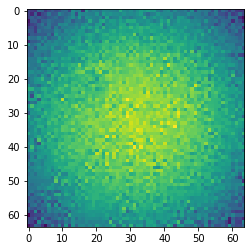

In [78]:
def loss_function():
    prediction = math.native_call(u_net, x)
    return math.l2_loss(prediction - y), prediction

for i in range(200):
    loss, pred = nn.update_weights(u_net, optimizer, loss_function)

plt.imshow(pred.numpy('y,x'))

## Further Reading

[🌐 **ML4Science**](https://github.com/tum-pbs/ML4Science)
&nbsp; • &nbsp; [📖 **Documentation**](https://tum-pbs.github.io/ML4Science/)
&nbsp; • &nbsp; [🔗 **API**](https://tum-pbs.github.io/ML4Science/ml4s)
&nbsp; • &nbsp; [**▶ Videos**]()
&nbsp; • &nbsp; [<img src="images/colab_logo_small.png" height=4>](https://colab.research.google.com/github/tum-pbs/ML4Science/blob/main/docs/Examples.ipynb) [**Examples**](https://tum-pbs.github.io/ML4Science/Examples.html)